# DS201 Final Project: Video Game Sales Prediction

<hr>

**Problem Description:**

This dataset contains several observations, each represents a single Video Game, with several features including a game title (text analysis?), metacritic rating for the game, publisher, developer, etc...

**Warning**: Not every game has a matching metacritic review, as some of the older games existed before the time of metacritic. So you will have to weigh your options with this missing data, drop, fill in, etc...

Your taks is to predict the ```Global Sales``` column, you must perform some EDA to find which features are most strongly correlated with the ```Global_sales``` figure, clean and preprocess the data, split up dataset into test and train, model the data against several models, and evaluate model performance to find the most performant model.
<hr>

**Remember! Although These processces have been talked about as a series of steps:**

1) EDA

2) Cleaning

3) Feat Engineering

4) Modeling

5) Model Evaluation

**This is more of an iterative process!** 

You may build a model only to find you're accuracy is low, which will require you to go back and engineer new features or maybe preform some more EDA to ensure that you've selected the most important features, given the problem at hand.

<hr>
<br>

## Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set() 
pd.set_option('max_columns', 100)

## Load Data

In [3]:
vg = pd.read_csv('./data/vg_sales.csv')

In [9]:
vg.head(50)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,NaN,NaN,NaN,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.28,9.14,6.50,2.88,29.80,89.0,65.0,8.5,431.0,Nintendo,E
7,Wii Play,Wii,2006.0,Misc,Nintendo,13.96,9.18,2.93,2.84,28.92,58.0,41.0,6.6,129.0,Nintendo,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.44,6.94,4.70,2.24,28.32,87.0,80.0,8.4,594.0,Nintendo,E
9,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# notes ^ : are all series valuable 

In [114]:
vg_objects = vg.dtypes[vg.dtypes == 'object']
vg_objects

Name         object
Platform     object
Genre        object
Publisher    object
Developer    object
Rating       object
dtype: object

In [6]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         7590 non-null float64
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [ ]:
#  "User_Counts" find why its obj => change to float64

In [115]:
# before 
vg['User_Score'].value_counts(dropna=False).head(10)

NaN    9129
7.8     324
8.0     289
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: User_Score, dtype: int64

In [116]:
# replace tbd with NaN
vg['User_Score'].value_counts(dropna=False).head(10)

NaN    9129
7.8     324
8.0     289
8.2     282
8.3     254
8.5     253
7.5     251
7.9     249
8.1     244
7.7     240
Name: User_Score, dtype: int64

In [ ]:
# replace "tbh" to NAN;  replace NAN with means of segment means => find out segments that correlate

In [117]:
vg['Critic_Score'].value_counts(dropna=False).head(10)

NaN     8582
70.0     256
71.0     254
75.0     245
78.0     240
73.0     238
80.0     237
76.0     234
72.0     226
74.0     226
Name: Critic_Score, dtype: int64

In [112]:
vg['Publisher'].value_counts(dropna=False)

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   705
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Eidos Interactive                          198
Midway Games                               198
505 Games                                  191
Microsoft Game Studios                     191
Acclaim Enter

In [14]:
# before
vg.shape

(16719, 16)

In [15]:
vg_no_outliers = vg['Global_Sales'] < 70
vg = vg[vg_no_outliers]

In [16]:
vg.shape

(16718, 16)

In [ ]:
#  rows will decrease, do the most to retain them 

In [118]:
# before 
vg.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
# year of release: find out why no year of relase; 1) drop 2) replace with "Unknown" group 3) find mean 
# publisher: 1) find out which 'Publisher' from 'Develope' =>
# Critic Score && User Score: Replace with mean of segments 
# Critic Count && User Count: 1) Find if adds value => Drop if not
# Rating: Find if adds value => if not drop; else fill with Publisher

In [35]:
vg.describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,16450.0,2006.487356,5.878995,1980.00,2003.00,2007.00,2010.00,2020.00
NA_Sales,16719.0,0.263330,0.813514,0.00,0.00,0.08,0.24,41.36
EU_Sales,16719.0,0.145025,0.503283,0.00,0.00,0.02,0.11,28.96
JP_Sales,16719.0,0.077602,0.308818,0.00,0.00,0.00,0.04,10.22
Other_Sales,16719.0,0.047332,0.186710,0.00,0.00,0.01,0.03,10.57
Global_Sales,16719.0,0.533543,1.547935,0.01,0.06,0.17,0.47,82.53
Critic_Score,8137.0,68.967679,13.938165,13.00,60.00,71.00,79.00,98.00
Critic_Count,8137.0,26.360821,18.980495,3.00,12.00,21.00,36.00,113.00
User_Count,7590.0,162.229908,561.282326,4.00,10.00,24.00,81.00,10665.00


In [ ]:
# Y0R, y? 2020 => fing out if error; replace if error
# YOR, the older, the less sales 
# Sales => more sales in NA, greater weights? Drop other countries? (Figure out how to do it)
# O

## Basic EDA

**Each row represents a single AD, each had has several features**

In [ ]:
vg.columns

### Dataset 5-num Summary and Description

In [4]:
# change 'tbd' to Nan
NaN = vg['User_Score'].value_counts(dropna=False).head(10).index[0]
vg['User_Score'] = vg['User_Score'].replace('tbd', NaN)

In [270]:
# wrong way of doing 
# for i, x in vg['User_Score'].items(): 
#     if isinstance(x, str):
#         vg['User_Score'][i] = float(x)

In [5]:
vg['User_Score'] = vg['User_Score'].apply(float)

In [272]:
vg['User_Score'].head(25)

0     8.0
1     NaN
2     8.3
3     8.0
4     NaN
5     NaN
6     8.5
7     6.6
8     8.4
9     NaN
10    NaN
11    8.6
12    NaN
13    7.7
14    6.3
15    7.4
16    8.2
17    9.0
18    NaN
19    7.9
20    NaN
21    NaN
22    NaN
23    8.1
24    8.7
Name: User_Score, dtype: float64

In [6]:
vg_ints = (vg['User_Score'].notna()) & (vg['User_Score'] != 'tbd') 
# vg['User_Score'][vg_ints]
print('max: ', vg['User_Score'][vg_ints].max())
print('min: ', vg['User_Score'][vg_ints].min())
print('mean: ', vg['User_Score'][vg_ints].mean())

max:  9.7
min:  0.0
mean:  7.1250461133070315


C:\Users\iamal\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


### Column Data Types

### View Sampling of Rows

**ALL SALES FIGURES ARE IN MILLIONS OF UNITS SOLD**

Hint: You may be able to calcualte ACTUAL sales figures ($) by finding the average pricve of game for each release year

In [ ]:
vg.sample(10)

<hr>
<br>

## Column Breakdown

### Target: ```Global_Sales```: Continuous Variable

### ```Rating```: ESRB rating: ```E```: Everyone, ```T```: Teen, etc
### ```Developer```: Who made the game?
### ```Publisher```: Who marketed / sold the game?
### ```Platform```: For which platform do the sales figures pertain to
> There may be multiple releases for the same title, say ```Batman: Return to Arkham``` on PS4 and XOne or 
```The Legend of Zelda: Twilight Princess``` on Wii and Gamecube."

<hr>
<br>

## Intermediate EDA

**Just to get you started**

### ```Global_Sales```

In [ ]:
## Whole DF: Global_sales

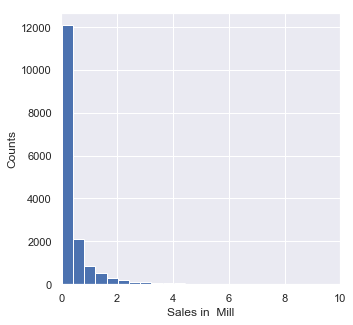

In [17]:
plt.figure()
vg['Global_Sales'].hist(figsize=(5,5), bins=100)
ax = plt.gca()
plt.xlim(0, 10)
ax.set_xlabel('Sales in  Mill')
ax.set_ylabel('Counts')
plt.show()

In [ ]:
# Big Publisher DF: Global Sales

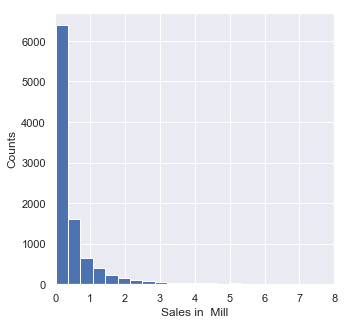

In [25]:
plt.figure()
big_pubs_df['Global_Sales'].hist(figsize=(5,5), bins=100)
ax = plt.gca()
plt.xlim(0, 8)
ax.set_xlabel('Sales in  Mill')
ax.set_ylabel('Counts')
plt.show()

In [ ]:
# Small Publisher DF: Global Sales

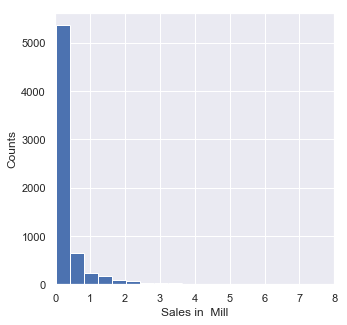

In [24]:
plt.figure()
small_pubs_df['Global_Sales'].hist(figsize=(5,5), bins=100)
ax = plt.gca()
plt.xlim(0, 8)
ax.set_xlabel('Sales in  Mill')
ax.set_ylabel('Counts')
plt.show()

In [ ]:
### big publisher: Global Sales Distrtibution 

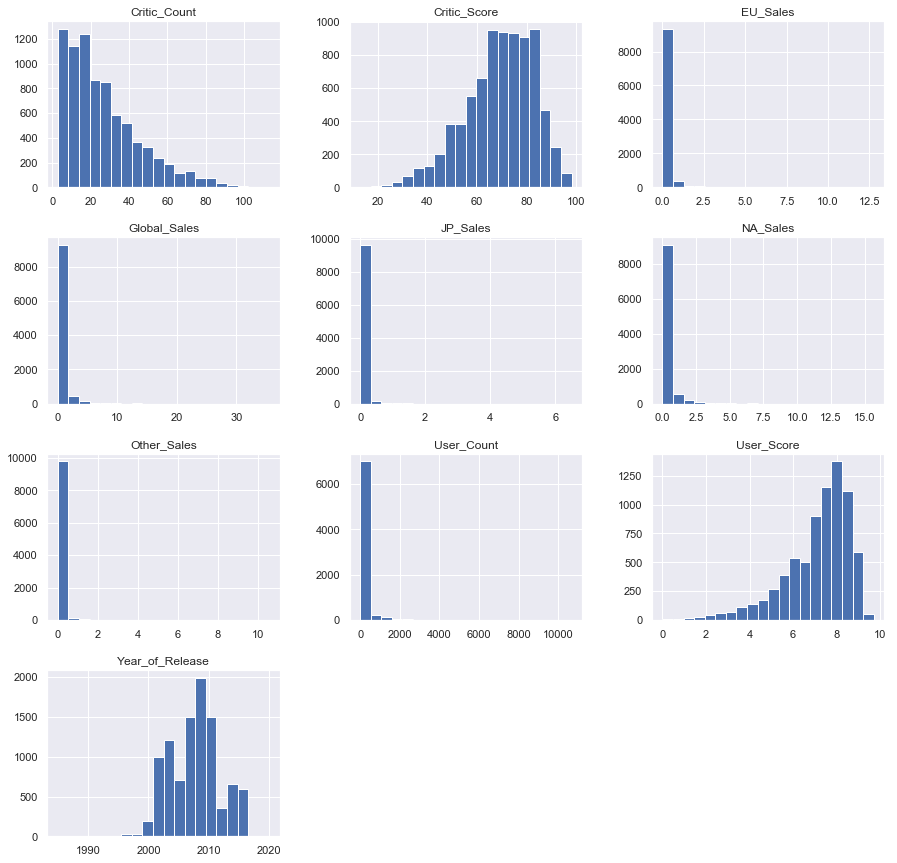

In [23]:

biggest_pubs = vg[features].value_counts().head(15).index
big_pubs_df = vg[vg[features].isin(biggest_pubs)]

small_pubs_df = (vg[~vg[features].isin(biggest_pubs)])

big_pubs_df.hist(figsize=(15,15), bins=20)
plt.show()

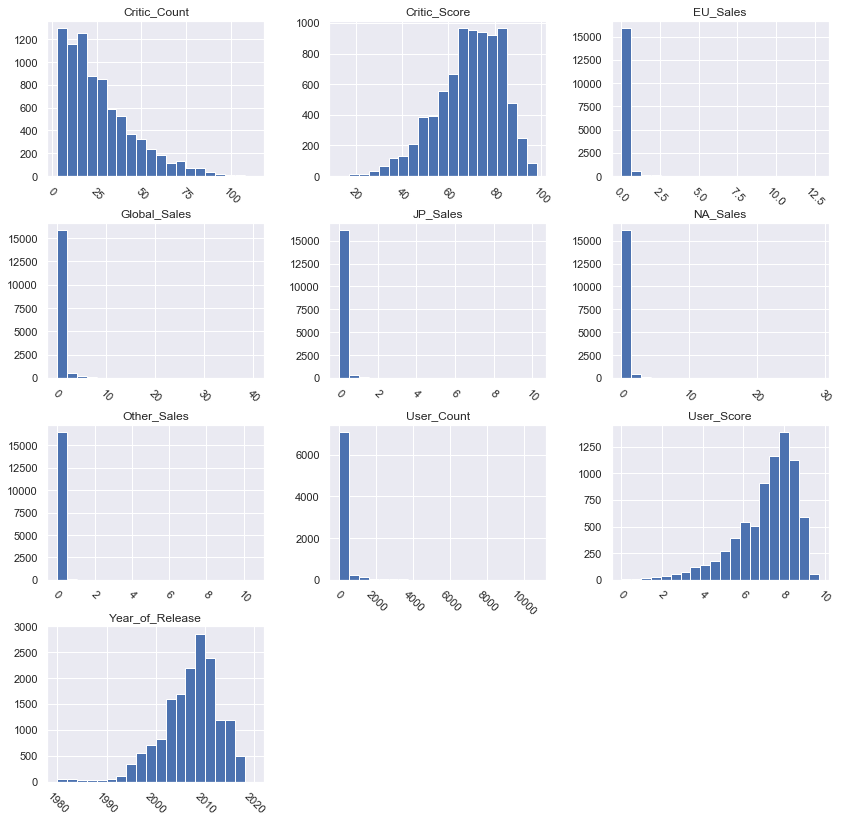

In [21]:
# Plot histogram grid
vg.hist(xrot=-45, figsize=(14, 14), bins=20)
ax = plt.gca()
ax.set_ylabel('sasasas')
# Clear the text "residue"
plt.show()

In [ ]:
# 14,000 under 1/2 million in sales  
#  Outliers: drop?
#  find which ones r > .5 mill
# group high sales?

# compare < .5 && >.5 

## Publishers

In [285]:
vg.describe(include=["object"]).T

,count,unique,top,freq
Name,16717,11562,Need for Speed: Most Wanted,12
Platform,16719,31,PS2,2161
Genre,16717,12,Action,3370
Publisher,16665,581,Electronic Arts,1356
Developer,10096,1696,Ubisoft,204
Rating,9950,8,E,3991


<Figure size 1080x1152 with 0 Axes>

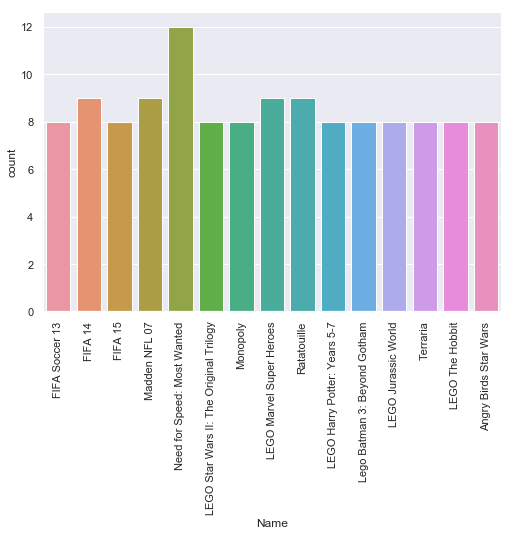

<Figure size 1080x1152 with 0 Axes>

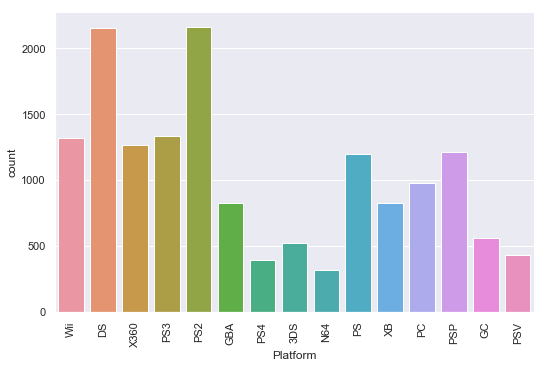

<Figure size 1080x1152 with 0 Axes>

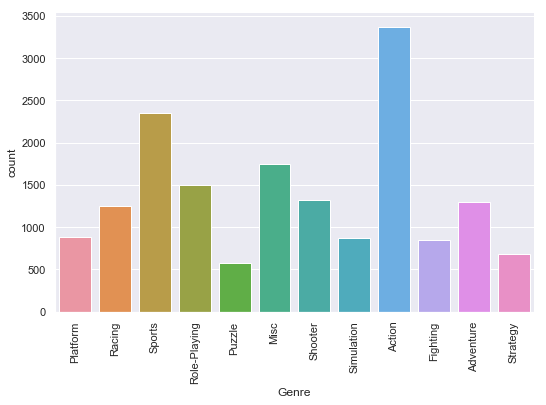

<Figure size 1080x1152 with 0 Axes>

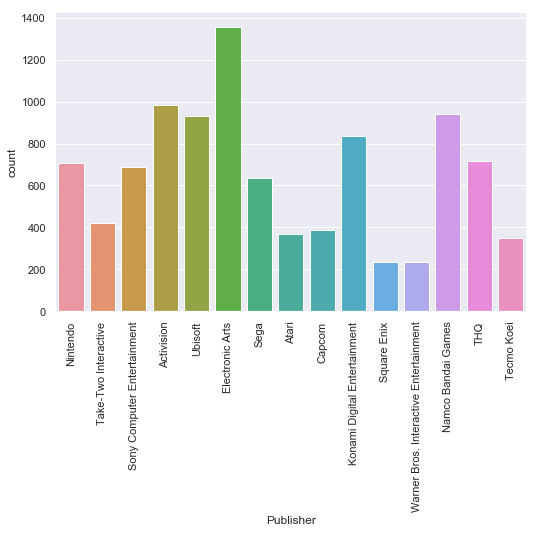

<Figure size 1080x1152 with 0 Axes>

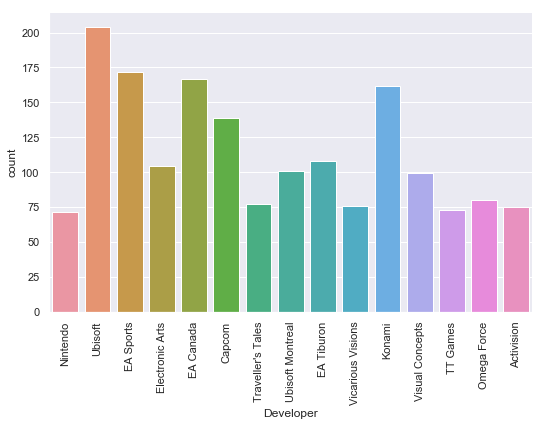

<Figure size 1080x1152 with 0 Axes>

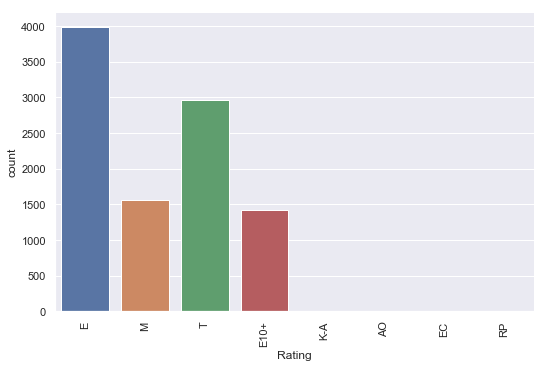

In [22]:
# Plot bar plot for each categorical feature
for features in vg.dtypes[vg.dtypes == "object"].index: 
    plt.figure(figsize=(15,16))
    biggest_feat = vg[features].value_counts().head(15).index
    big_feat_df = vg[vg[features].isin(biggest_feat)]
    sns.catplot(features, aspect=1.5, kind= "count", data=big_feat_df)
    plt.xticks(rotation=90)
    plt.show()

## Correlations -> ```Critic_Score``` vs ```Global_Sales```

Year_of_Release


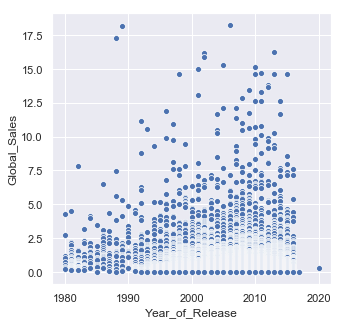

NA_Sales


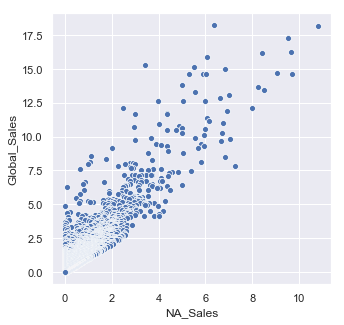

EU_Sales


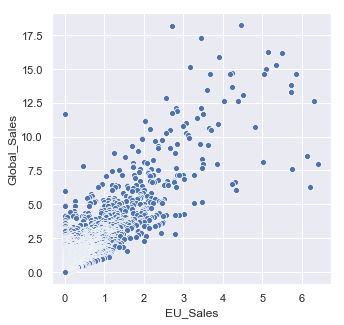

JP_Sales


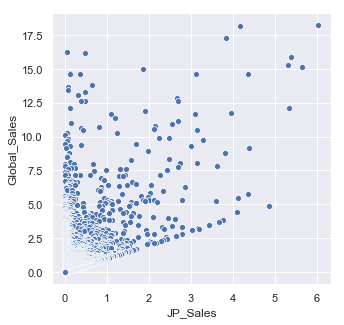

Other_Sales


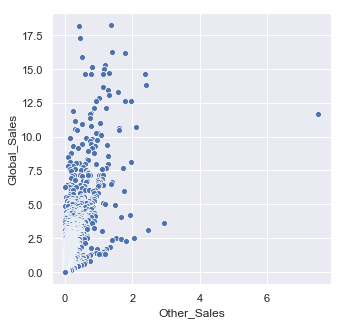

Global_Sales


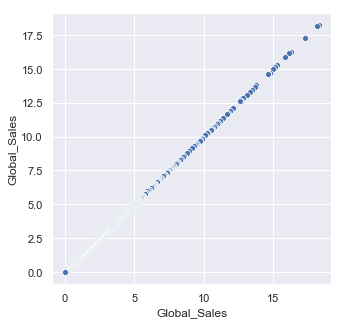

Critic_Score


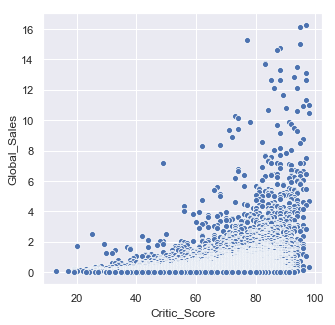

Critic_Count


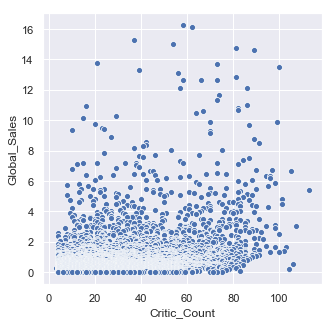

User_Score


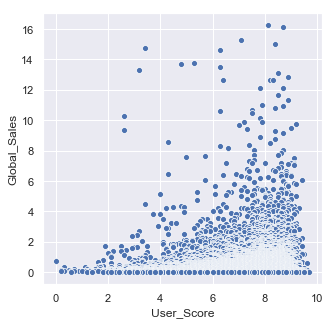

User_Count


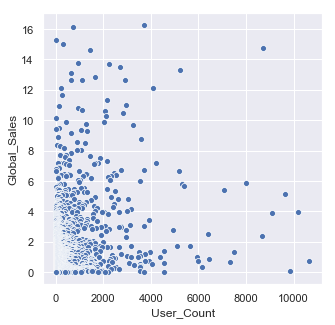

In [286]:
less_20_sales =  vg["Global_Sales"] < 20
minus_bestsellers2 = vg[less_20_sales]
for feature in vg.dtypes[ vg.dtypes == 'float64' ].index:
    print(feature)
    plt.figure(figsize=(5,5))
    sns.scatterplot(x = feature, y = 'Global_Sales', data=minus_bestsellers2)
    plt.show()

# Good Luck!

In [ ]:
## Correlation GRID

In [26]:
correlation = vg.corr()

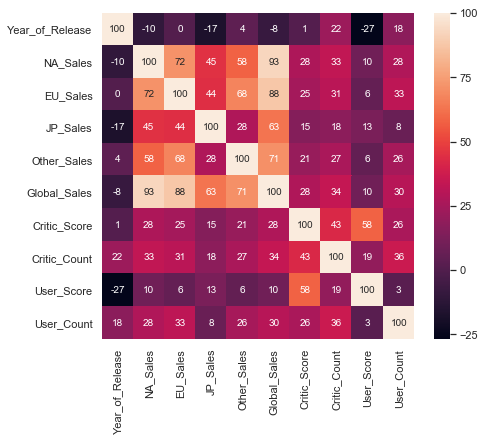

In [29]:
plt.figure(figsize=(7,6))
sns.heatmap(correlation * 100, annot=True, fmt='.0f')
sns.set_style('white')
plt.show()

In [28]:
#notes:
# JP & Other Sales  = Low Corr 
# Critic Score = Low Corr
# User_Score = Low Corr

bool_mask = np.zeros_like(correlation, dtype=np.bool)
bool_mask[np.triu_indices_from(bool_mask)] = True

In [31]:
biggest_publish = vg['Publisher'].value_counts().head(25).index
big_publish_df = vg[vg['Publisher'].isin(biggest_publish)]
biggest_publish

Index(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft',
       'Konami Digital Entertainment', 'THQ', 'Nintendo',
       'Sony Computer Entertainment', 'Sega', 'Take-Two Interactive', 'Capcom',
       'Atari', 'Tecmo Koei', 'Warner Bros. Interactive Entertainment',
       'Square Enix', 'Disney Interactive Studios', 'Unknown',
       'Eidos Interactive', 'Midway Games', 'Microsoft Game Studios',
       '505 Games', 'Acclaim Entertainment', 'D3Publisher', 'Vivendi Games',
       'Codemasters'],
      dtype='object')

In [123]:
vg['Publisher'].value_counts().tail(30)

Ecole                      1
Illusion Softworks         1
The Learning Company       1
Giga                       1
American Softworks         1
NDA Productions            1
Altron                     1
Image Epoch                1
Grand Prix Games           1
Imadio                     1
Milestone                  1
Mirai Shounen              1
Square EA                  1
CPG Products               1
ITT Family Games           1
Codemasters Online         1
TOHO                       1
Ultravision                1
Hearty Robin               1
T&E Soft                   1
Evolution Games            1
UIG Entertainment          1
Panther Software           1
Seventh Chord              1
Magical Company            1
989 Sports                 1
CBS Electronics            1
TechnoSoft                 1
White Park Bay Software    1
Warp                       1
Name: Publisher, dtype: int64

In [32]:
big_publish_df['Publisher'].value_counts()

Electronic Arts                           1356
Activision                                 985
Namco Bandai Games                         939
Ubisoft                                    933
Konami Digital Entertainment               834
THQ                                        715
Nintendo                                   705
Sony Computer Entertainment                687
Sega                                       638
Take-Two Interactive                       422
Capcom                                     386
Atari                                      367
Tecmo Koei                                 348
Warner Bros. Interactive Entertainment     235
Square Enix                                234
Disney Interactive Studios                 218
Unknown                                    201
Eidos Interactive                          198
Midway Games                               198
Microsoft Game Studios                     191
505 Games                                  191
Acclaim Enter

In [ ]:
# sns.swarmplot(y='Global_Sales', x='Publisher', data=big_publish_df )
# plt.show()

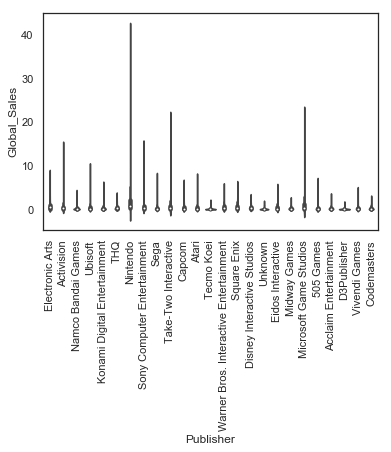

In [34]:
_ = sns.violinplot(y = "Global_Sales", x = "Publisher", data=big_publish_df, figsize=(45,45), order=biggest_publish )
plt.xticks(rotation='vertical')
# plt.ylim(0, 20)
plt.show()

In [35]:
vg.groupby('Publisher').mean()['Global_Sales']['Nintendo']

2.420255319148933

In [36]:
vg.groupby('Publisher').mean()['Global_Sales'].max()

4.17

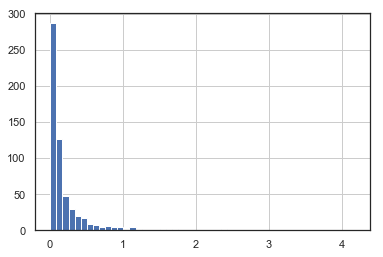

In [37]:
vg.groupby('Publisher').mean()['Global_Sales'].hist(bins=50)
plt.show()

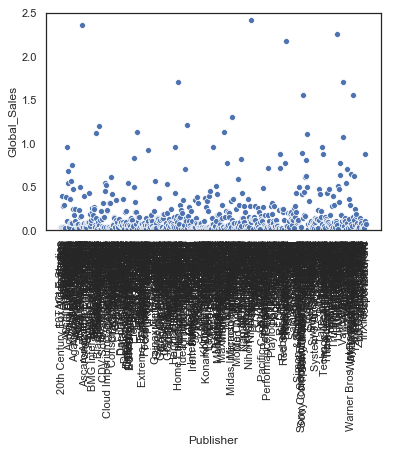

In [121]:
sns.scatterplot( x=vg.groupby('Publisher').mean().index, y='Global_Sales', data=vg.groupby('Publisher').mean())
plt.xticks(rotation='vertical') 
plt.ylim(0, 2.5)
plt.show()


In [ ]:
# I can add hue when I create 3 categories for big_pub_sales

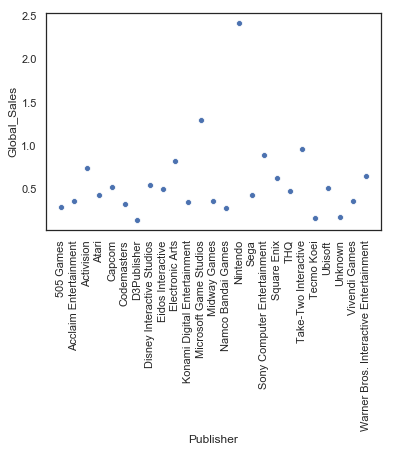

In [41]:
sns.scatterplot( x=big_publish_df.groupby('Publisher').mean().index, y='Global_Sales', data=big_publish_df.groupby('Publisher').mean())
plt.xticks(rotation='vertical') 
plt.show()

In [ ]:
# notes: 
# the more counts you have('big publisher') does not mean you have big global sales
# => do NINTENDO summary statistics (distibution)
# Category (Nintendo(big), med/small)?
# take out outliers for Ninetendo a ==> Ooutliers Above 36

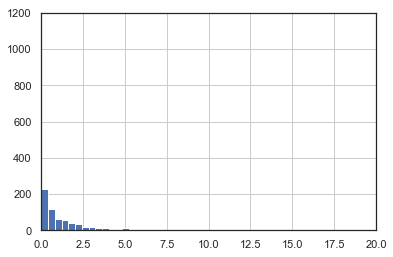

In [38]:
# biggest_publish = vg['Publisher'].value_counts().head(10).index
# big_publish_df = vg[vg['Publisher'].isin(biggest_publish)]
# biggest_publish

ntdo_ = vg['Publisher'] == 'Nintendo' 
ntdo_df = vg[ntdo_]
ntdo_df['Global_Sales'].hist(bins=100)
plt.xlim(0, 20)
plt.ylim(0,1200)
plt.show()

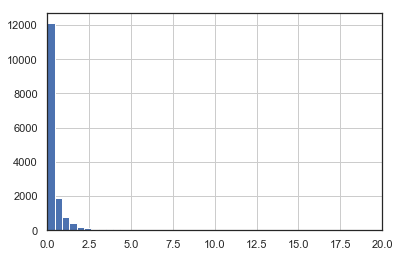

In [39]:
not_ntdo = vg['Publisher'] != 'Nintendo' 
not_ntdo_df = vg[not_ntdo]
not_ntdo_df['Global_Sales'].hist(bins=50)
plt.xlim(0, 20)
plt.show()

In [101]:
ntdo_df[ntdo_df['Global_Sales'] < 40].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,698.0,2003.924069,7.786146,1983.00,2000.0000,2005.00,2009.000,2016.00
NA_Sales,704.0,1.060412,2.321891,0.00,0.0075,0.36,0.960,26.93
EU_Sales,704.0,0.548963,1.351654,0.00,0.0075,0.12,0.480,12.76
JP_Sales,704.0,0.635753,1.028745,0.00,0.0900,0.28,0.730,10.22
Other_Sales,704.0,0.121392,0.335399,0.00,0.0000,0.03,0.090,3.29
Global_Sales,704.0,2.366534,4.540258,0.01,0.2900,0.89,2.225,35.52
Critic_Score,309.0,75.524272,11.100349,43.00,69.0000,76.00,84.000,97.00
Critic_Count,309.0,42.000000,21.116252,4.00,25.0000,40.00,58.000,88.00
User_Count,293.0,197.389078,339.150377,4.00,27.0000,72.00,190.000,2147.00


In [102]:
not_ntdo_df[not_ntdo_df['Global_Sales'] < 40].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_of_Release,15750.0,2006.602349,5.751696,1980.00,2003.00,2008.00,2010.00,2020.00
NA_Sales,16013.0,0.223921,0.517165,0.00,0.00,0.07,0.22,15.00
EU_Sales,16013.0,0.125252,0.352269,0.00,0.00,0.02,0.10,9.09
JP_Sales,16013.0,0.052412,0.187336,0.00,0.00,0.00,0.03,4.87
Other_Sales,16013.0,0.043506,0.163587,0.00,0.00,0.01,0.03,10.57
Global_Sales,16013.0,0.445356,0.960647,0.01,0.06,0.16,0.43,21.81
Critic_Score,7827.0,68.707934,13.976672,13.00,60.00,70.00,79.00,98.00
Critic_Count,7827.0,25.740258,18.624207,3.00,11.00,21.00,35.00,113.00
User_Count,7296.0,160.796053,568.396951,4.00,10.00,23.00,77.00,10665.00


In [129]:
(vg.groupby('Publisher').mean()).head()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Publisher,,,,,,,,,
10TACLE Studios,2006.666667,0.023333,0.013333,0.0,0.000000,0.036667,42.000000,4.000000,5.000000
1C Company,2010.333333,0.003333,0.023333,0.0,0.003333,0.033333,73.000000,18.666667,89.333333
20th Century Fox Video Games,1981.400000,0.364000,0.020000,0.0,0.002000,0.388000,NaN,NaN,NaN
2D Boy,2008.000000,0.000000,0.030000,0.0,0.010000,0.040000,90.000000,26.000000,607.000000
3DO,2000.500000,0.180000,0.084444,0.0,0.017500,0.281111,57.470588,12.647059,7.533333


In [ ]:
# PLATFORM  >>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>

In [124]:
vg['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [76]:
biggest_platf

Index(['PS2', 'DS', 'PS3', 'Wii', 'X360', 'PSP', 'PS', 'PC', 'XB', 'GBA', 'GC',
       '3DS', 'PSV', 'PS4', 'N64', 'XOne', 'SNES', 'SAT', 'WiiU', '2600', 'GB',
       'NES', 'DC', 'GEN'],
      dtype='object')

In [87]:
biggest_platf = vg['Platform'].value_counts().head(22).index
big_platf_df = vg[vg['Platform'].isin(biggest_platf)]
big_platf_df['Platform'].value_counts()

PS2     2161
DS      2152
PS3     1331
Wii     1319
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      432
PS4      393
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
Name: Platform, dtype: int64

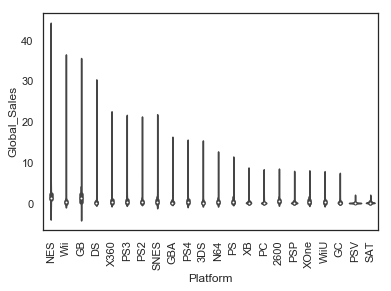

In [111]:
_ = sns.violinplot(y = "Global_Sales", x = "Platform", data=big_platf_df, figsize=(5,25))
plt.xticks(rotation='vertical')
plt.show()

In [146]:
vg.groupby('Platform').mean()['Global_Sales']['Wii']

0.6879772727272712

In [153]:
vg.groupby('Platform').mean()['Global_Sales'].max()

2.606632653061223

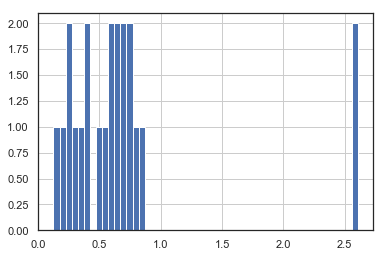

In [88]:
big_platf_df.groupby('Platform').mean()['Global_Sales'].hist(bins=50)
plt.show()

In [65]:
big_platf_df.groupby('Platform').mean().index

Index(['2600', '3DS', 'DS', 'GBA', 'GC', 'N64', 'PC', 'PS', 'PS2', 'PS3',
       'PS4', 'PSP', 'PSV', 'SAT', 'SNES', 'Wii', 'WiiU', 'X360', 'XB',
       'XOne'],
      dtype='object', name='Platform')

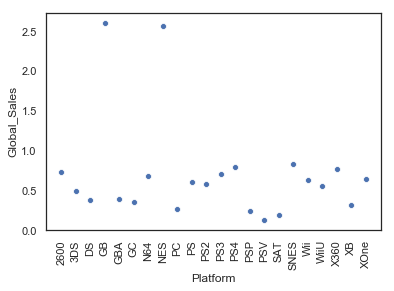

In [89]:
sns.scatterplot( x=big_platf_df.groupby('Platform').mean().index, y='Global_Sales', data=big_platf_df.groupby('Platform').mean())
plt.xticks(rotation='vertical') 
plt.show()

In [ ]:
# sns.scatterplot( x=big_platf_df.groupby('Publisher').mean().index, y='Global_Sales', data=big_platf_df.groupby('Publisher').mean())
# plt.xticks(rotation='vertical') 
# plt.show()

In [ ]:
# New Data Point- Platform: Big > 1; 1 > Medium > .5 ; small < .5  

In [ ]:
# sns.swarmplot(y='Global_Sales', x='Platform', data=vg )
# plt.show()

In [98]:
biggest_dev = vg['Developer'].value_counts().head(25).index
big_dev_df = vg[vg['Developer'].isin(biggest_dev)]
big_dev_df['Developer'].value_counts()


Ubisoft                         204
EA Sports                       172
EA Canada                       167
Konami                          162
Capcom                          139
EA Tiburon                      108
Electronic Arts                 104
Ubisoft Montreal                101
Visual Concepts                  99
Omega Force                      80
Traveller's Tales                77
Vicarious Visions                76
Activision                       75
TT Games                         73
Nintendo                         71
THQ                              71
Namco                            64
Codemasters                      62
Artificial Mind and Movement     61
Midway                           60
Yuke's                           59
Harmonix Music Systems           56
High Voltage Software            55
Maxis                            49
Square Enix                      48
Name: Developer, dtype: int64

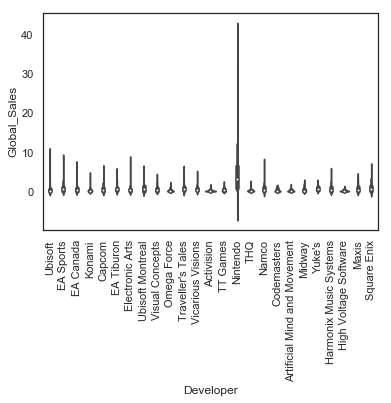

In [92]:
sns.violinplot(y = "Global_Sales", x = "Developer", data=big_dev_df, figsize=(25,25), order=biggest_dev)
plt.xticks(rotation='vertical')
plt.show()

In [93]:
vg.groupby('Developer').mean()['Global_Sales'].max()

21.81

In [94]:
vg.groupby('Developer').mean()['Global_Sales']['Nintendo']

6.326478873239438

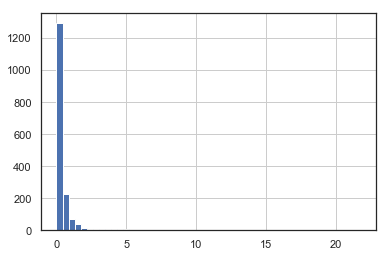

In [101]:
vg.groupby('Developer').mean()['Global_Sales'].hist(bins=50)
# plt.xlim(0,7)
plt.show()

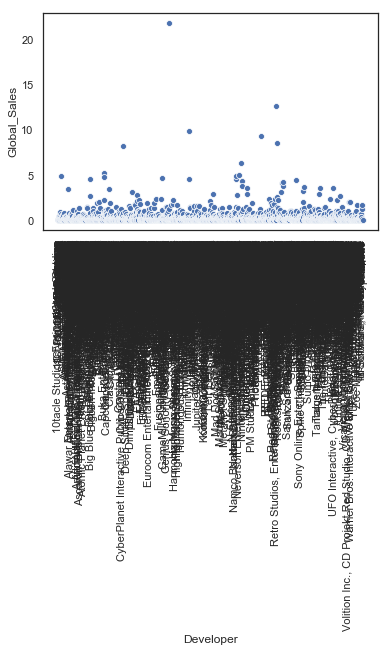

In [96]:
sns.scatterplot( x=vg.groupby('Developer').mean().index, y='Global_Sales', data=vg.groupby('Developer').mean())
plt.xticks(rotation='vertical') 
plt.show()

In [ ]:
# New Data Point - Developer: Small < 1.5; 2.5 <= Med < 7; Big >= 7   

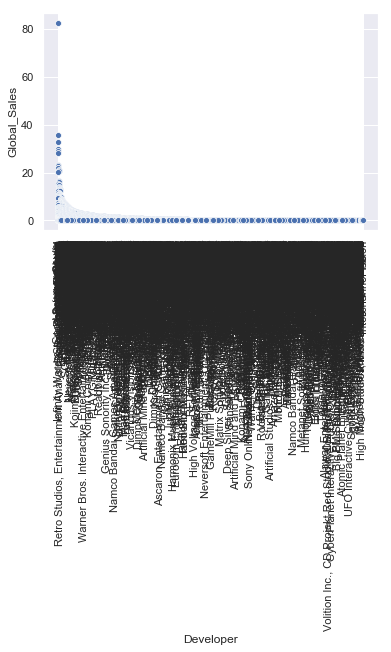

In [257]:
sns.scatterplot(data=vg, y='Global_Sales', x='Developer')
plt.xticks(rotation='vertical')
# plt.ylim(0,38)
plt.show()

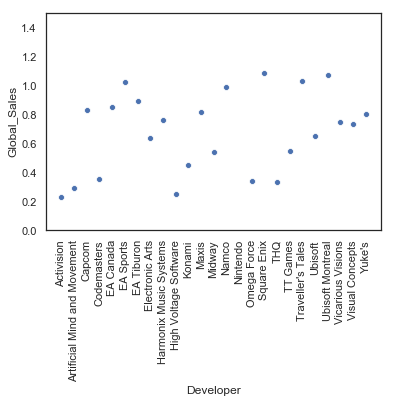

In [100]:
sns.scatterplot( x=big_dev_df.groupby('Developer').mean().index, y='Global_Sales', data=big_dev_df.groupby('Developer').mean())
plt.xticks(rotation='vertical') 
plt.ylim(0,1.5)
plt.show()

In [125]:
sns.scatterplot( x='Developer', y='Global_Sales', data=big_dev_df.groupby('Developer').mean())
plt.xticks(rotation='vertical') 
plt.ylim(0,1.5)
plt.show()

ValueError: Could not interpret input 'Developer'

In [ ]:
# sns.swarmplot(y='Global_Sales', x='Developer', data=vg )
# plt.show()

In [161]:
# New Data Point - Developer: Small < .6;  Big >= .6   

In [166]:
# biggest_dev = vg['Genre'].value_counts().head(25)
# big_dev_df = vg[vg['Genre'].isin(biggest_dev.index)]
# big_dev_df['Genre'].value_counts()
# biggest_dev 

Action          3370
Sports          2348
Misc            1750
Role-Playing    1500
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       874
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

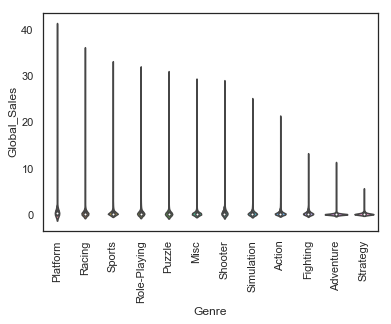

In [102]:
sns.violinplot(y = "Global_Sales", x = "Genre", data=vg, figsize=(25,25) )
plt.xticks(rotation='vertical')
plt.show()

In [180]:
vg.groupby('Genre').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
Genre,,,,,,,,,
Action,2008.050181,0.260834,0.154045,0.047905,0.054777,0.517884,66.629101,27.780952,188.889617
Adventure,2008.263728,0.080783,0.048764,0.040138,0.012655,0.182417,65.331269,22.114551,103.410000
Fighting,2004.653524,0.263086,0.118174,0.103039,0.042827,0.527067,69.217604,27.909535,64.929825
Misc,2007.328298,0.232726,0.121566,0.061777,0.042509,0.458960,66.619503,21.533461,31.113895
Platform,2003.857631,0.501689,0.225619,0.147331,0.057534,0.932523,68.058350,23.698189,109.128505
Puzzle,2005.230228,0.211845,0.086224,0.098810,0.021345,0.419000,67.424107,20.308036,32.500000
Racing,2004.864600,0.287710,0.189359,0.045404,0.060929,0.583587,67.963612,23.028302,69.372855
Role-Playing,2007.130816,0.220540,0.125807,0.236973,0.039753,0.622933,72.652646,32.489824,320.746972
Shooter,2006.033179,0.447649,0.239864,0.029297,0.078692,0.795873,70.181144,35.610169,374.577922


In [103]:
vg.groupby('Genre').mean()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
Genre,,,,,,,,,,
Action,2008.050181,0.260834,0.154045,0.047905,0.054777,0.517884,66.629101,27.780952,7.054044,188.889617
Adventure,2008.263728,0.080783,0.048764,0.040138,0.012655,0.182417,65.331269,22.114551,7.133000,103.410000
Fighting,2004.653524,0.263086,0.118174,0.103039,0.042827,0.527067,69.217604,27.909535,7.302506,64.929825
Misc,2007.328298,0.232726,0.121566,0.061777,0.042509,0.458960,66.619503,21.533461,6.819362,31.113895
Platform,2003.857631,0.501689,0.225619,0.147331,0.057534,0.932523,68.058350,23.698189,7.301402,109.128505
Puzzle,2005.230228,0.211845,0.086224,0.098810,0.021345,0.419000,67.424107,20.308036,7.175000,32.500000
Racing,2004.864600,0.287710,0.189359,0.045404,0.060929,0.583587,67.963612,23.028302,7.036193,69.372855
Role-Playing,2007.130816,0.220540,0.125807,0.236973,0.039753,0.622933,72.652646,32.489824,7.619515,320.746972
Shooter,2006.033179,0.447649,0.239864,0.029297,0.078692,0.795873,70.181144,35.610169,7.041883,374.577922


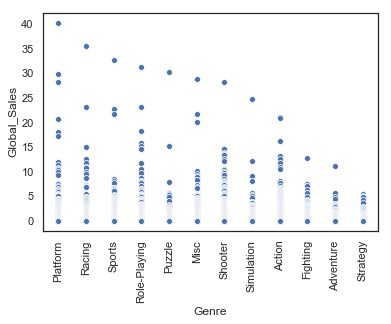

In [104]:
sns.scatterplot(data=vg, y='Global_Sales', x='Genre')
plt.xticks(rotation='vertical')
plt.show()

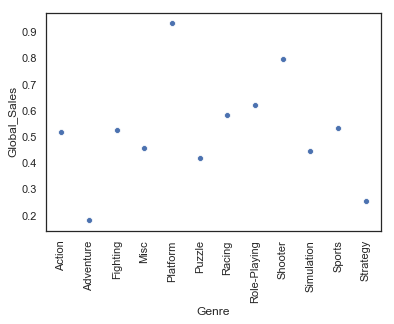

In [105]:
order = ['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Music', 'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure', 'Strategy']
sns.scatterplot( x=vg.groupby('Genre').mean().index, y='Global_Sales', data=vg.groupby('Genre').mean())
plt.xticks(rotation='vertical') 
plt.show()

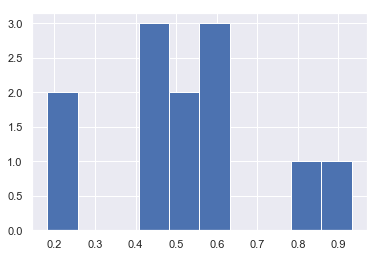

In [202]:
vg.groupby('Genre').mean()['Global_Sales'].hist()
# plt.xlim(0,5)
plt.show()

In [ ]:
# New Data Point - Genre: Small < .4; .4 <= Med < .7; Big >= .7   

In [238]:
vg['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

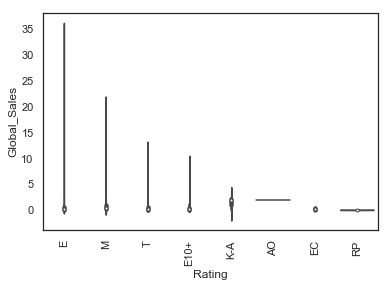

In [107]:
sns.violinplot(y = "Global_Sales", x = "Rating", data=vg, figsize=(25,25) )
plt.xticks(rotation='vertical')
plt.show()

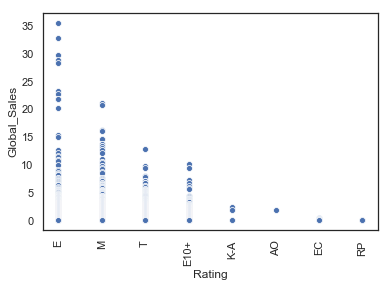

In [108]:
sns.scatterplot(data=vg, y='Global_Sales', x='Rating')
plt.xticks(rotation='vertical')
plt.show()

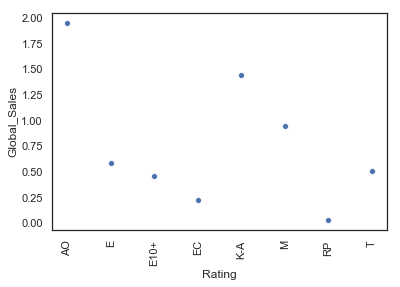

In [109]:
sns.scatterplot( x=vg.groupby('Rating').mean().index, y='Global_Sales', data=vg.groupby('Rating').mean())
plt.xticks(rotation='vertical') 
plt.show()

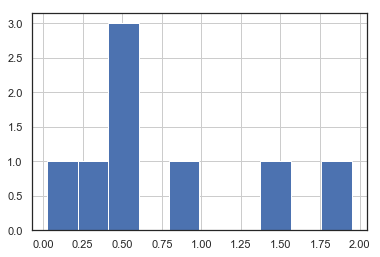

In [110]:
vg.groupby('Rating').mean()['Global_Sales'].hist()
# plt.xlim(0,5)
plt.show()

In [ ]:
# Rating: No new data point, just group low_counts


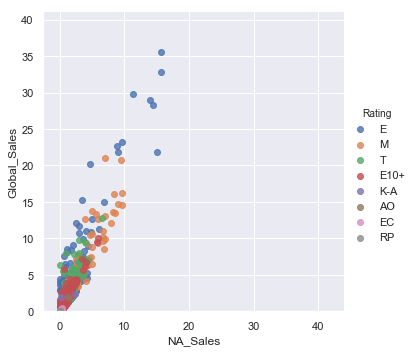

In [281]:
sns.lmplot(x="NA_Sales", y="Global_Sales", hue='Rating', data=vg, fit_reg=None)
plt.ylim(0, 41)
plt.show()

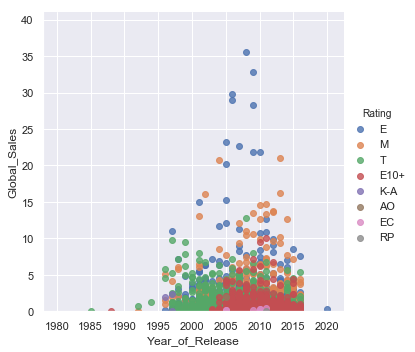

In [244]:
sns.lmplot(x="Year_of_Release", y="Global_Sales", data=vg, hue='Rating',fit_reg=None)
plt.ylim(0, 41)
plt.show()

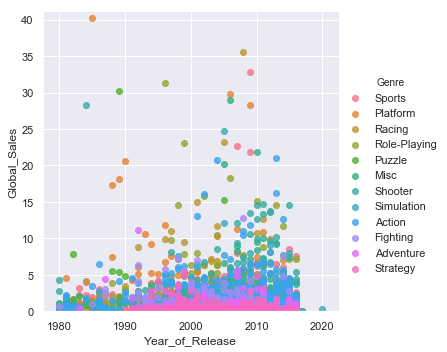

In [258]:
sns.lmplot(x="Year_of_Release", y="Global_Sales", data=vg, hue='Genre',fit_reg=None)
plt.ylim(0, 41)
plt.show()

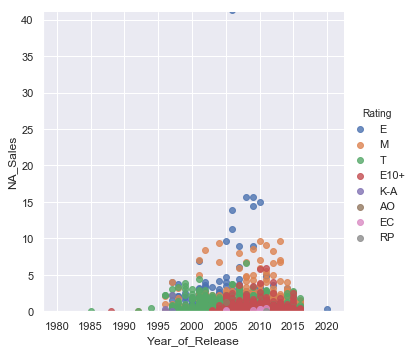

In [259]:
sns.lmplot(x="Year_of_Release", y="NA_Sales", data=vg, hue='Rating',fit_reg=None)
plt.ylim(0, 41)
plt.show()

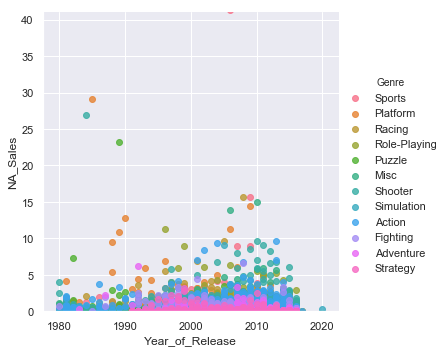

In [262]:
sns.lmplot(x="Year_of_Release", y="NA_Sales", data=vg, hue='Genre',fit_reg=None)
plt.ylim(0, 41)
plt.show()

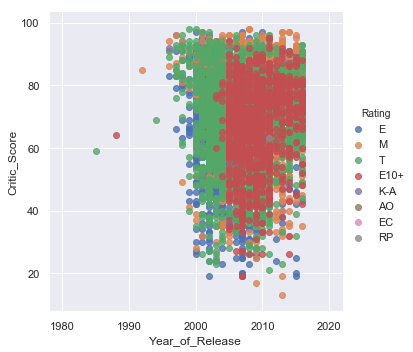

In [267]:
sns.lmplot(x="Year_of_Release", y="Critic_Score", data=vg, hue='Rating',fit_reg=None)
# plt.ylim(0, 41)
plt.show()

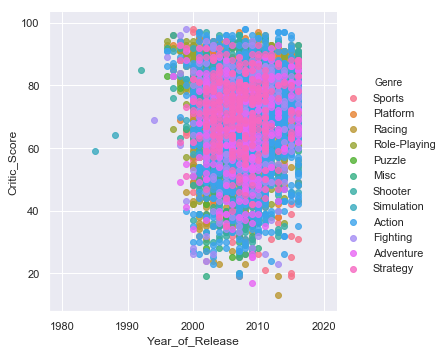

In [268]:
sns.lmplot(x="Year_of_Release", y="Critic_Score", data=vg, hue='Genre',fit_reg=None)
# plt.ylim(0, 41)
plt.show()

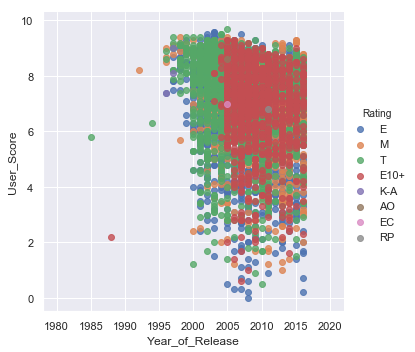

In [273]:
sns.lmplot(x="Year_of_Release", y="User_Score", data=vg, hue='Rating',fit_reg=None)
# plt.ylim(0, 41)
plt.show()

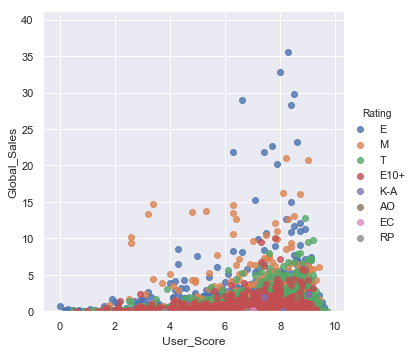

In [275]:
sns.lmplot(y="Global_Sales", x="User_Score", data=vg, hue='Rating',fit_reg=None)
plt.ylim(0, 41)
plt.show()

In [ ]:
# as User_Score ^, E-R games ^

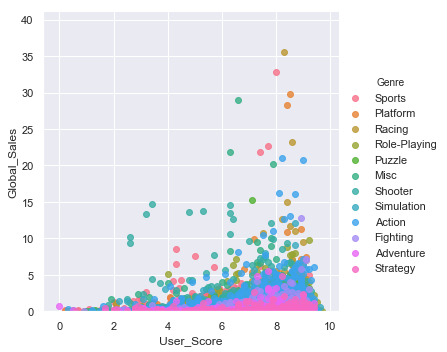

In [276]:
sns.lmplot(y="Global_Sales", x="User_Score", data=vg, hue='Genre',fit_reg=None)
plt.ylim(0, 41)
plt.show()

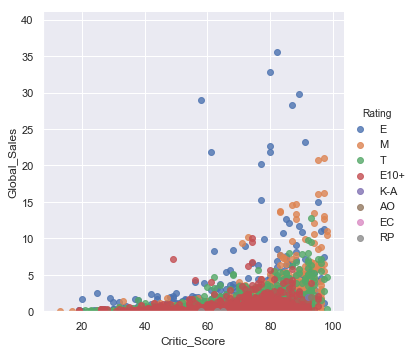

In [282]:
sns.lmplot(y="Global_Sales", x="Critic_Score", data=vg, hue='Rating',fit_reg=None)
plt.ylim(0, 41)
plt.show()

In [ ]:
# M is rated pretty high
# Could I rceate new data points for E 

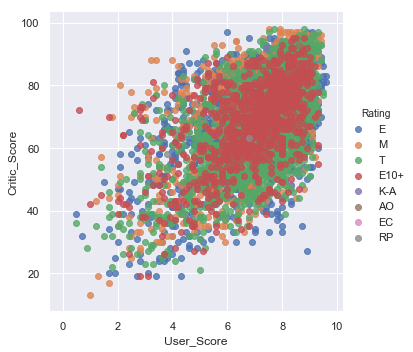

In [278]:
sns.lmplot(y="Critic_Score", x="User_Score", data=vg, hue='Rating',fit_reg=None)
# plt.ylim(0, 41)
plt.show()